<a href="https://colab.research.google.com/github/sanjeetnc/AI-with-Cybersecurity/blob/main/AI_Prediction_CCFD02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Credit_Card_Fraud_Detection.xlsx to Credit_Card_Fraud_Detection (1).xlsx
Dataset Shape: (690, 17)

Missing Values:
 Unnamed: 0     0
Customer_ID    0
A_1            0
A_2            0
A_3            0
A_4            0
A_5            0
A_6            0
A_7            0
A_8            0
A_9            0
A_10           0
A_11           0
A_12           0
A_13           0
A_14           0
class          0
dtype: int64

Fraud Count:
 A_9
0    395
1    295
Name: count, dtype: int64


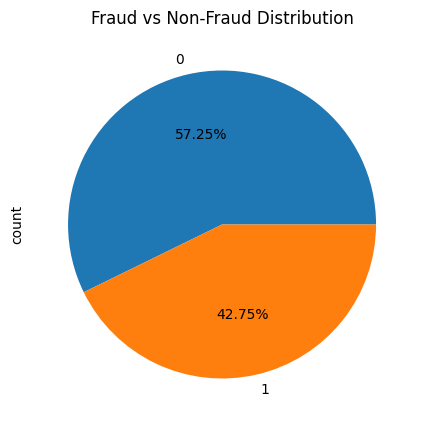


Training samples: 552
Testing samples: 138


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



========== LOGISTIC REGRESSION ==========
Accuracy: 0.8405797101449275
[[78  9]
 [13 38]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        87
           1       0.81      0.75      0.78        51

    accuracy                           0.84       138
   macro avg       0.83      0.82      0.83       138
weighted avg       0.84      0.84      0.84       138


========== RANDOM FOREST ==========
Accuracy: 0.8695652173913043
[[78  9]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        87
           1       0.82      0.82      0.82        51

    accuracy                           0.87       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.87      0.87       138



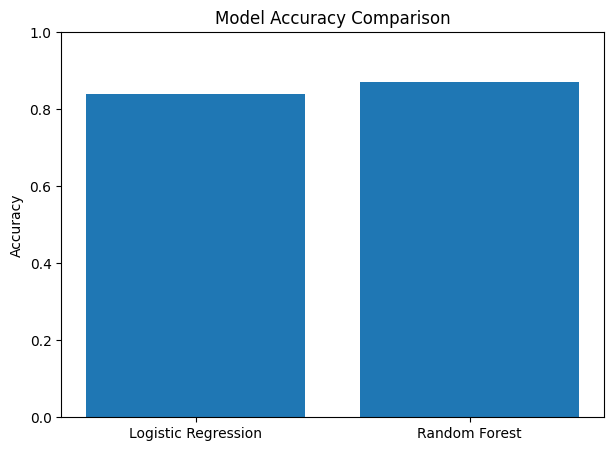

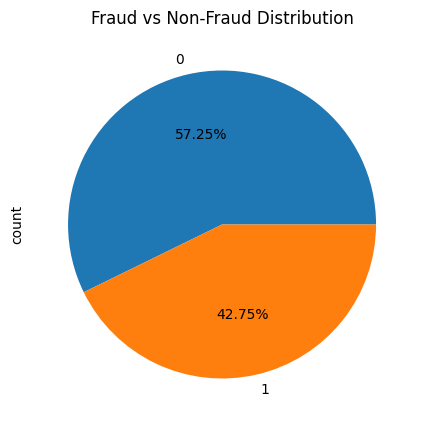

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Best Model Selected: Random Forest


<Figure size 640x480 with 0 Axes>

In [2]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
dp=files.upload()
data=pd.read_excel(r"Credit_Card_Fraud_Detection.xlsx")
data



df = data

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFraud Count:\n", df["A_9"].value_counts())

plt.figure(figsize=(5,5))
df["A_9"].value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()




scaler = StandardScaler()
df["A_2"] = scaler.fit_transform(df["A_2"].values.reshape(-1,1))
df["A_10"]   = scaler.fit_transform(df["A_10"].values.reshape(-1,1))

X = df.drop("class", axis=1)
y = df["class"]





X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))






lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)





lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)





print("\n========== LOGISTIC REGRESSION ==========")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print("\n========== RANDOM FOREST ==========")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))





models = ["Logistic Regression", "Random Forest"]
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred)
]

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5,5))
df["A_9"].value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

plt.savefig("Credit_Card_Fraud_Detection.png")




best_model = rf if accuracies[1] > accuracies[0] else lr
print("\nBest Model Selected:",
      "Random Forest" if best_model==rf else "Logistic Regression")



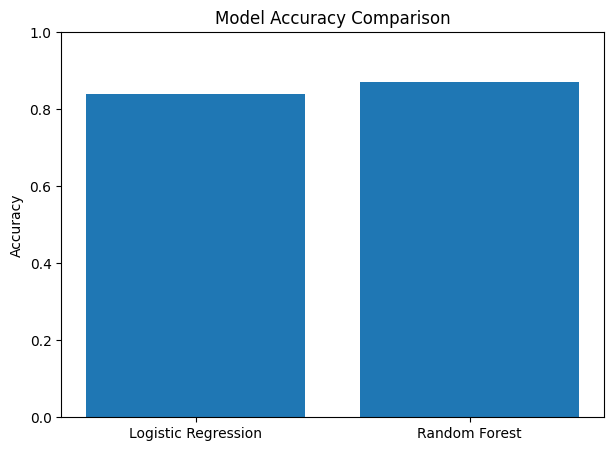

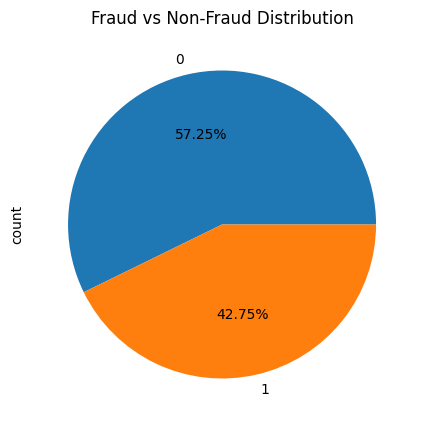

<Figure size 640x480 with 0 Axes>

In [8]:

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5,5))
df["A_9"].value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

plt.savefig("CCFD_prediction.png")
plt.show()



In [9]:
files.download("CCFD_prediction.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>